## Introduction

## <span style="color:#555">Data:</span>
The train and test data will consist of various features that describe that property in Bengaluru. This is an actual data set that is curated over months of primary & secondary research by our team. Each row contains fixed size object of features. There are 9 features and each feature can be accessed by its name.

## <span style="color:#555">Features</span>
* Area_type – describes the area
* Availability – when it can be possessed or when it is ready(categorical and time-series)
* Location – where it is located in Bengaluru
* Price – Value of the property in lakhs(INR)
* Size – in BHK or Bedroom (1-10 or more)
* Society – to which society it belongs
* Total_sqft – size of the property in sq.ft
* Bath – No. of bathrooms
* Balcony – No. of the balcony

## <span style="color:#555">Problem Statement</span>
With the given 9 features(categorical and continuous) build a model to predict the price of houses in Bengaluru.

## Library Imports

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import datetime
import re

import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)



## Exploratory Analysis

In [2]:
df = pd.read_csv('Predicting-House-Prices-In-Bengaluru-Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,12/19/2019,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### Basic Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.6+ KB


In [4]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [5]:
df.shape

(13320, 9)

In [6]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [7]:
df.describe(include='object')

,area_type,availability,location,size,society,total_sqft
count,13320,13320,13319,13304,7818,13320
unique,4,81,1305,31,2688,2117
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200
freq,8790,10581,540,5199,80,843


In [8]:
# See the unqiue values in object type features
for name in df.dtypes[df.dtypes=='object'].index:
    print(name, '==> ',df[name].unique())

area_type ==>  ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
availability ==>  ['12/19/2019' 'Ready To Move' '5/18/2019' '2/18/2019' '11/18/2019'
 '12/20/2019' '10/17/2019' '12/21/2019' '9/19/2019' '9/20/2019' '3/18/2019'
 '2/20/2019' '4/18/2019' '8/20/2019' '10/18/2019' '3/19/2019' '9/17/2019'
 '12/18/2019' '8/17/2019' '4/19/2019' '6/18/2019' '12/22/2019' '1/22/2019'
 '8/18/2019' '1/19/2019' '7/17/2019' '7/18/2019' '6/21/2019' '5/20/2019'
 '8/19/2019' '9/18/2019' '5/17/2019' '6/17/2019' '5/21/2019' '1/18/2019'
 '3/20/2019' '12/17/2019' '3/16/2019' '6/19/2019' '6/22/2019' '7/19/2019'
 '2/21/2019' 'Immediate Possession' '5/19/2019' '11/17/2019' '10/20/2019'
 '6/20/2019' '2/19/2019' '10/21/2019' '1/21/2019' '3/17/2019' '4/17/2019'
 '5/22/2019' '10/19/2019' '7/21/2019' '11/21/2019' '3/21/2019' '12/16/2019'
 '3/22/2019' '1/20/2019' '9/21/2019' '8/21/2019' '11/14/2019' '11/19/2019'
 '11/15/2019' '7/16/2019' '6/15/2019' '2/17/2019' '11/20/2019' '7/20/2019'
 '9/16/2019

In [9]:
for name in df.dtypes[df.dtypes=='object'].index:
    print(name, '==> ',df[name].value_counts())

area_type ==>  Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
availability ==>  Ready To Move           10581
12/18/2019                307
5/18/2019                 295
4/18/2019                 271
8/18/2019                 200
12/19/2019                185
7/18/2019                 143
3/18/2019                 131
6/18/2019                  99
12/20/2019                 98
12/21/2019                 93
3/19/2019                  88
2/18/2019                  62
11/18/2019                 47
1/18/2019                  43
9/18/2019                  41
6/19/2019                  40
10/18/2019                 39
1/19/2019                  39
7/19/2019                  36
12/17/2019                 29
1/20/2019                  24
10/17/2019                 21
9/19/2019                  21
6/22/2019                  19
8/19/2019                  18
6/21/2019                  17
8/20/2019  

### Distributions

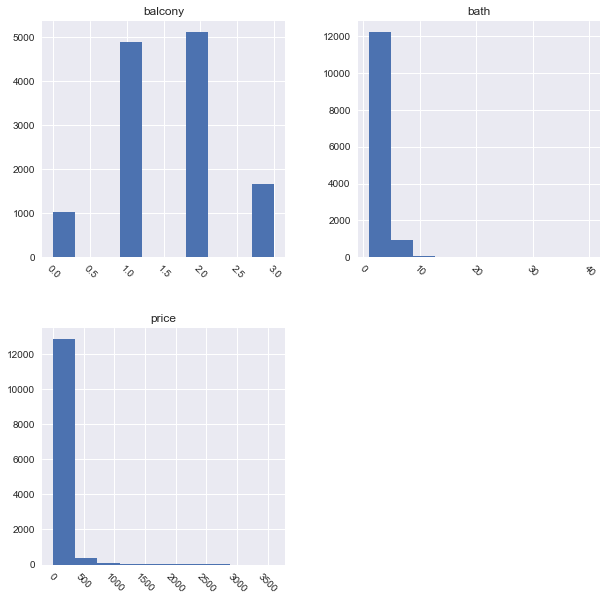

In [10]:
df.hist(figsize=(10,10), xrot=-45)
plt.show()

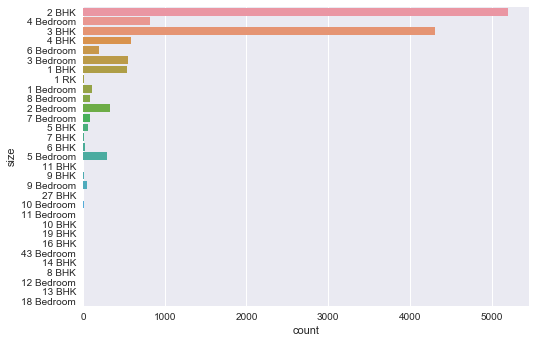

In [11]:
sns.countplot(y='size',data=df)
plt.show()

### Feature Relationship - Segmentation & Correlations

In [12]:
correlations = df.corr()
correlations

,bath,balcony,price
bath,1.000000,0.204201,0.456345
balcony,0.204201,1.000000,0.120355
price,0.456345,0.120355,1.000000


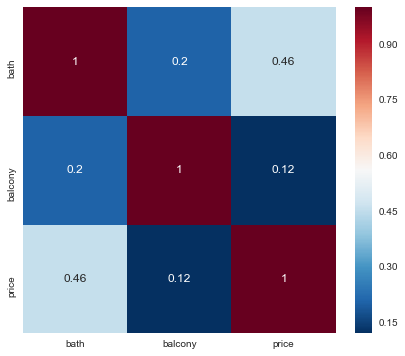

In [13]:
plt.figure(figsize=(7,6))
sns.heatmap(correlations,annot=True,cmap='RdBu_r')

## Data Cleaning

In [14]:
df.shape

(13320, 9)

### Drop Unwanted Observations

In [15]:
df = df.drop_duplicates()
df.shape

(12791, 9)

### Handling Missing Values

In [16]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

In [17]:
df.balcony.value_counts()

2.0    4846
1.0    4700
3.0    1630
0.0    1010
Name: balcony, dtype: int64

In [18]:
df.balcony.fillna(0, inplace=True)
df.bath.fillna(0, inplace=True)
df['size'].fillna('Missing',inplace=True)
df['society'].fillna('Missing',inplace=True)
df['location'].fillna('Missing',inplace=True)

In [19]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

### Fix Structural Errors

In [20]:
df['size'].value_counts()

2 BHK         4931
3 BHK         4120
4 Bedroom      824
4 BHK          574
3 Bedroom      535
1 BHK          521
2 Bedroom      314
5 Bedroom      291
6 Bedroom      191
1 Bedroom      104
8 Bedroom       84
7 Bedroom       82
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
Missing         16
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
10 BHK           2
11 BHK           2
11 Bedroom       2
43 Bedroom       1
13 BHK           1
19 BHK           1
12 Bedroom       1
18 Bedroom       1
16 BHK           1
14 BHK           1
27 BHK           1
Name: size, dtype: int64

In [78]:
df['size']=df['size'].str.replace('Bedroom', 'BHK')

In [22]:
df['size'].value_counts()

2 BHK      5245
3 BHK      4655
4 BHK      1398
1 BHK       625
5 BHK       350
6 BHK       221
7 BHK        99
8 BHK        89
9 BHK        54
Missing      16
10 BHK       14
1 RK         13
11 BHK        4
13 BHK        1
43 BHK        1
18 BHK        1
16 BHK        1
19 BHK        1
12 BHK        1
14 BHK        1
27 BHK        1
Name: size, dtype: int64

## Feature Engineering

Creating new feature called **size_num**

In [23]:
df['size_num']=df['size'].str.replace('BHK', ' ')

In [24]:
df['size_num']=df['size_num'].str.replace('RK', '')
df['size_num']=df['size_num'].str.replace('Missing', '0').astype(int)

In [25]:
df['size_num'].value_counts()

2     5245
3     4655
4     1398
1      638
5      350
6      221
7       99
8       89
9       54
0       16
10      14
11       4
14       1
19       1
18       1
27       1
43       1
12       1
16       1
13       1
Name: size_num, dtype: int64

In [26]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
size_num          int32
dtype: object

** Creating two new features for total_sqft because some observations are having the range(min sqft - max sqft) **
    * total_sqft_min contains minimium value
    * total_sqft_max contains maximium value

In [27]:
import re
t_min = []
t_max = []
#text = '\w* - \w'
for value in df.total_sqft:
    #print(value)
    if re.search('-', value):
        min, max = value.split('-')
        t_min.append(float(min))
        t_max.append(float(max))
        #print(value, 'yes')
    else:
        t_min.append(0)
        t_max.append(value)
        #print(value, 'No')
        

In [28]:
print(len(t_min),len(t_max))

12791 12791


In [29]:
df['total_sqft_min'] = t_min
df['total_sqft_max'] = t_max

In [30]:
t_max_conv = []

for value in df.total_sqft_max:
    if re.search("Sq. M", str(value)):
        num, unit = value.split('Sq.')
        num = 10.7639 * float(num)
        t_max_conv.append(np.round(float(num),2))
    elif re.search('Sq. Y', str(value)):
        num, unit = value.split('Sq.')
        num = 9 * float(num)
        t_max_conv.append(np.round(float(num),2))
    elif re.search('Ac', str(value)):
        num, unit = value.split('Ac')
        num = 43560 * float(num)
        t_max_conv.append(np.round(float(num),2))
    elif re.search('Pe', str(value)) or re.search('Cents', str(value)) or re.search('G', str(value)):
        value = re.findall(r'(\d+)(\w+?)', value)[0][0]
        t_max_conv.append(float(value) )
    else:
        t_max_conv.append(float(value))

In [31]:
df['total_sqft_max'] = t_max_conv

In [32]:
df.dtypes

area_type          object
availability       object
location           object
size               object
society            object
total_sqft         object
bath              float64
balcony           float64
price             float64
size_num            int32
total_sqft_min    float64
total_sqft_max    float64
dtype: object

In [33]:
df['size'].value_counts()

2 BHK      5245
3 BHK      4655
4 BHK      1398
1 BHK       625
5 BHK       350
6 BHK       221
7 BHK        99
8 BHK        89
9 BHK        54
Missing      16
10 BHK       14
1 RK         13
11 BHK        4
13 BHK        1
43 BHK        1
18 BHK        1
16 BHK        1
19 BHK        1
12 BHK        1
14 BHK        1
27 BHK        1
Name: size, dtype: int64

In [34]:
print(df.location.value_counts())

Whitefield                                  523
Sarjapur  Road                              379
Electronic City                             287
Kanakpura Road                              249
Thanisandra                                 229
Yelahanka                                   210
Marathahalli                                169
Hebbal                                      161
Raja Rajeshwari Nagar                       159
Uttarahalli                                 157
Hennur Road                                 149
Bannerghatta Road                           149
7th Phase JP Nagar                          135
Electronic City Phase II                    128
Rajaji Nagar                                107
Haralur Road                                102
Bellandur                                    93
KR Puram                                     91
Hoodi                                        88
Electronics City Phase 1                     88
Yeshwanthpur                            

In [35]:
df.availability.unique()

array(['12/19/2019', 'Ready To Move', '5/18/2019', '2/18/2019',
       '11/18/2019', '12/20/2019', '10/17/2019', '12/21/2019', '9/19/2019',
       '9/20/2019', '3/18/2019', '2/20/2019', '4/18/2019', '8/20/2019',
       '10/18/2019', '3/19/2019', '9/17/2019', '12/18/2019', '8/17/2019',
       '4/19/2019', '6/18/2019', '12/22/2019', '1/22/2019', '8/18/2019',
       '1/19/2019', '7/17/2019', '7/18/2019', '6/21/2019', '5/20/2019',
       '8/19/2019', '9/18/2019', '5/17/2019', '6/17/2019', '5/21/2019',
       '1/18/2019', '3/20/2019', '12/17/2019', '3/16/2019', '6/19/2019',
       '6/22/2019', '7/19/2019', '2/21/2019', 'Immediate Possession',
       '5/19/2019', '11/17/2019', '10/20/2019', '6/20/2019', '2/19/2019',
       '10/21/2019', '1/21/2019', '3/17/2019', '4/17/2019', '5/22/2019',
       '10/19/2019', '7/21/2019', '11/21/2019', '3/21/2019', '12/16/2019',
       '3/22/2019', '1/20/2019', '9/21/2019', '8/21/2019', '11/14/2019',
       '11/19/2019', '11/15/2019', '7/16/2019', '6/15/2019'

In [36]:
df.availability.value_counts()

Ready To Move           10172
5/18/2019                 292
12/18/2019                284
4/18/2019                 269
8/18/2019                 187
12/19/2019                176
7/18/2019                 131
3/18/2019                 130
6/18/2019                  98
12/20/2019                 94
3/19/2019                  85
12/21/2019                 79
2/18/2019                  62
11/18/2019                 45
1/18/2019                  43
10/18/2019                 39
6/19/2019                  35
7/19/2019                  34
9/18/2019                  33
1/19/2019                  32
12/17/2019                 29
10/17/2019                 21
9/19/2019                  20
6/22/2019                  19
1/20/2019                  18
8/19/2019                  18
6/21/2019                  17
Immediate Possession       16
4/19/2019                  16
8/20/2019                  16
                        ...  
11/19/2019                  6
2/21/2019                   6
7/20/2019 

** Creating new feature called availability_days which shows the value as months **

In [37]:
from datetime import date

days_indicator = []

def d(s):
  [month, day, year] = map(int, s.split('/'))
  return date(year, month, day)
  
def days(start, end):
  return (d(end) - d(start)).days
  

for value in df.availability:
    if re.search('/', value):
        date_only = date.today()
        dt = datetime.datetime.strptime(str(date_only), '%Y-%m-%d').strftime('%m/%d/%Y')

        days_indicator.append(days(dt, value))
    else:
        days_indicator.append(value)


In [38]:
df['availability_days']=days_indicator


In [39]:
filter_imme = df['availability_days']!='Immediate Possession'
filter_ready = df['availability_days']!='Ready To Move'
max_days = df['availability_days'][(filter_imme) & (filter_ready)].max()
min_days = df['availability_days'][(filter_imme) & (filter_ready)].min()
print('min_days - ',min_days,'max_days - ',max_days)

min_days -  -106 max_days -  234


In [40]:
df['availability_days'][df['availability_days']=='Ready To Move'].count()

10172

In [41]:
df.availability_days.replace('Immediate Possession',max_days+1, inplace=True)
df.availability_days.replace('Ready To Move',max_days+2, inplace=True)

In [42]:
def process_months(df, cut_points,label_names):
    df['aval_categories'] = pd.cut(df['availability_days'],cut_points,labels=label_names)
    return df

In [43]:
cut_points = [min_days-1,0,30,60,90,120,150,180,210,max_days,max_days+1,max_days+2]
label_names = ['NegativeMonths','1month','2months','3months','4months','5months','6months','7months','morethan7months',
'Immediate Possession','Ready To Move']

df = process_months(df,cut_points,label_names)

In [44]:
df['aval_categories'].value_counts()

Ready To Move           10172
NegativeMonths            725
morethan7months           678
1month                    335
4months                   236
2months                   193
3months                   192
6months                    90
5months                    78
7months                    76
Immediate Possession       16
Name: aval_categories, dtype: int64

In [48]:
location_encoder = LabelEncoder()
df['society'] = location_encoder.fit_transform(df['society'])
df['location'] = location_encoder.fit_transform(df['location'])

In [49]:
df.isnull().sum()

area_type            0
availability         0
location             0
size                 0
society              0
total_sqft           0
bath                 0
balcony              0
price                0
size_num             0
total_sqft_min       0
total_sqft_max       0
availability_days    0
aval_categories      0
dtype: int64

In [51]:
def create_dummies(df,column_names):
    dummies = pd.get_dummies(df[column_names],prefix=column_names)
    df = pd.concat([df,dummies],axis=1)
    return df

In [52]:
columns = ['area_type','aval_categories']
df = create_dummies(df,columns)

In [53]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,size_num,total_sqft_min,total_sqft_max,availability_days,aval_categories,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,aval_categories_NegativeMonths,aval_categories_1month,aval_categories_2months,aval_categories_3months,aval_categories_4months,aval_categories_5months,aval_categories_6months,aval_categories_7months,aval_categories_morethan7months,aval_categories_Immediate Possession,aval_categories_Ready To Move
0,Super built-up Area,12/19/2019,419,2 BHK,464,1056,2.0,1.0,39.07,2,0.0,1056.0,231,morethan7months,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,Plot Area,Ready To Move,317,4 BHK,2440,2600,5.0,3.0,120.00,4,0.0,2600.0,236,Ready To Move,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,Built-up Area,Ready To Move,1180,3 BHK,1306,1440,2.0,3.0,62.00,3,0.0,1440.0,236,Ready To Move,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Super built-up Area,Ready To Move,757,3 BHK,2187,1521,3.0,1.0,95.00,3,0.0,1521.0,236,Ready To Move,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,Super built-up Area,Ready To Move,716,2 BHK,1306,1200,2.0,1.0,51.00,2,0.0,1200.0,236,Ready To Move,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [54]:
df.shape

(12791, 29)

In [55]:
df.dtypes

area_type                                 object
availability                              object
location                                   int64
size                                      object
society                                    int64
total_sqft                                object
bath                                     float64
balcony                                  float64
price                                    float64
size_num                                   int32
total_sqft_min                           float64
total_sqft_max                           float64
availability_days                          int64
aval_categories                         category
area_type_Built-up  Area                   uint8
area_type_Carpet  Area                     uint8
area_type_Plot  Area                       uint8
area_type_Super built-up  Area             uint8
aval_categories_NegativeMonths             uint8
aval_categories_1month                     uint8
aval_categories_2mon

In [56]:
col_names = []
for c_name in df.dtypes[df.dtypes!='object'].index:
    col_names.append(c_name)
    
col_names

['location',
 'society',
 'bath',
 'balcony',
 'price',
 'size_num',
 'total_sqft_min',
 'total_sqft_max',
 'availability_days',
 'aval_categories',
 'area_type_Built-up  Area',
 'area_type_Carpet  Area',
 'area_type_Plot  Area',
 'area_type_Super built-up  Area',
 'aval_categories_NegativeMonths',
 'aval_categories_1month',
 'aval_categories_2months',
 'aval_categories_3months',
 'aval_categories_4months',
 'aval_categories_5months',
 'aval_categories_6months',
 'aval_categories_7months',
 'aval_categories_morethan7months',
 'aval_categories_Immediate Possession',
 'aval_categories_Ready To Move']

## Prepare Analytical Base Table

In [57]:
abt_df = df[col_names]

In [58]:
X = abt_df.drop(['price','aval_categories','availability_days'],axis=1)
y = abt_df.price
print(len(y))
y.shape

12791


(12791,)

In [59]:
X.head()

,location,society,bath,balcony,size_num,total_sqft_min,total_sqft_max,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,aval_categories_NegativeMonths,aval_categories_1month,aval_categories_2months,aval_categories_3months,aval_categories_4months,aval_categories_5months,aval_categories_6months,aval_categories_7months,aval_categories_morethan7months,aval_categories_Immediate Possession,aval_categories_Ready To Move
0,419,464,2.0,1.0,2,0.0,1056.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,317,2440,5.0,3.0,4,0.0,2600.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,1180,1306,2.0,3.0,3,0.0,1440.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,757,2187,3.0,1.0,3,0.0,1521.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,716,1306,2.0,1.0,2,0.0,1200.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


## Algorithm Selection

 * Following Algorithms are chosen for ABT
   * Regulaized Regression to prevent the overfit.
       * <code>Lasso, Ridge and ElasticNet</code>
   * Ensemble Methods
       * <code>RandomForest Regressor </code> & <code>Gradientboosting Regressor</code> trains the large number of decision trees and combines their predictions through bagging & boosting

## Model Training

### Data Spending

In [60]:
# Split the data
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123)
print(len(X_train),len(X_test),len(y_train),len(y_test))

10232 2559 10232 2559


### Pre-processing & Pipelines

In [62]:
pipelines = {
    'lasso' : make_pipeline(StandardScaler(),Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(),Ridge(random_state=123)),
    'enet'  : make_pipeline(StandardScaler(),ElasticNet(random_state=123)),
    'rf' : make_pipeline(StandardScaler(),RandomForestRegressor(random_state=123)),
    'gb' : make_pipeline(StandardScaler(),GradientBoostingRegressor(random_state=123))
}

### Hyperparameter Tunning

In [63]:
lasso_hyperparameters = {
    'lasso__alpha' : [0.001,0.005,0.01,0.05,0.1,0.5,1,10]
}
ridge_hyperparameters = {
    'ridge__alpha' : [0.001,0.005,0.01,0.05,0.1,0.5,1,10]
}
enet_hyperparameters = {
    'elasticnet__alpha' : [0.001,0.005,0.01,0.05,0.1,0.5,1,5,10],
    'elasticnet__l1_ratio' : [0.1,0.3,0.5,0.7,0.9]
}
# Random Forest hyperparameters
rf_hyperparameters = {
    'randomforestregressor__n_estimators': [100, 200],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33],
    'randomforestregressor__min_samples_leaf': [1, 3, 5, 10]
}
# Boosted Tree hyperparameters
gb_hyperparameters = {
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}

In [64]:
hyperparameters = {
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet'  : enet_hyperparameters,
    'rf'    : rf_hyperparameters,
    'gb'    : gb_hyperparameters
}

In [65]:
fitted_models = {}

for name, pipeline in pipelines.items():

    model = GridSearchCV(pipeline,hyperparameters[name],cv=10,n_jobs=-1)
    
    model.fit(X_train,y_train)
    fitted_models[name] = model
    
    print(name, 'has been fitted')

lasso has been fitted
ridge has been fitted
enet has been fitted
rf has been fitted
gb has been fitted


### Winner Selection

In [72]:
# Display best_score_ for each fitted model
for name, model in fitted_models.items():
    print( name, model.best_score_ )

lasso -0.000200842012484
ridge -0.288700372805
enet 0.102641824232
rf 0.616879264615
gb 0.598903421461


In [67]:
for model in fitted_models.keys():
    pred = fitted_models[model].predict(X_test)
    print(model)
    print('-------')
    print('R^2: ',r2_score(y_test,pred))
    print('MAE: ',mean_absolute_error(y_test,pred))

lasso
-------
R^2:  0.185994216931
MAE:  58.6073720345
ridge
-------
R^2:  0.191768085905
MAE:  57.9759075429
enet
-------
R^2:  0.112994958805
MAE:  66.7794317031
rf
-------
R^2:  0.586458502306
MAE:  33.6801533305
gb
-------
R^2:  0.500379426687
MAE:  34.0757552167


In [76]:
#    'randomforestregressor__n_estimators': [100, 200],
#    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33],
#    'randomforestregressor__min_samples_leaf': [1, 3, 5, 10]

print(fitted_models['rf'].best_estimator_)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.33, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=123, verbose=0, warm_start=False))])


In [79]:
rf_pred = fitted_models['rf'].predict(X_test)
#print(rf_pred[:10])
#print(X_test.shape)
#print(y_test[:])
for i in range(10):
    #print(i)
    print(np.round(rf_pred[i],2))
#print(y_test[:10])
#y.shape

81.04
52.75
42.04
180.65
181.31
31.49
47.96
149.54
79.19
93.78


### Insights & Analysis

Random Forest has less MAE output and R^2 has more value than other models